In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Titanic.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# here we are trying to predict the survived variable which is a binary variable

## Missing value handling

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

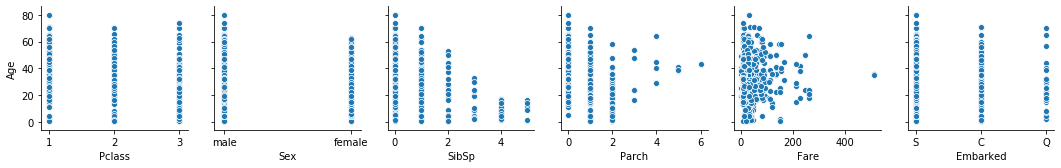

In [8]:
sns.pairplot(x_vars=['Pclass','Sex','SibSp','Parch','Fare','Embarked'],y_vars='Age',data=dataset)

In [9]:
dataset.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


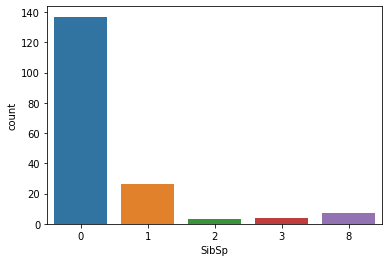

In [10]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])

In [11]:
dataset['Age'].median()

28.0

In [12]:
dataset['Age']=np.where((dataset['SibSp']==8) & (dataset['Age'].isnull()),28.0,dataset['Age'])

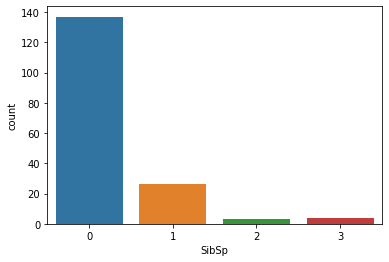

In [13]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])

In [14]:
dataset['Age']=np.where((dataset['SibSp']==0) & (dataset['Age'].isnull()),29.0,dataset['Age'])
dataset['Age']=np.where((dataset['SibSp']==1) & (dataset['Age'].isnull()),30.0,dataset['Age'])
dataset['Age']=np.where((dataset['SibSp']==2) & (dataset['Age'].isnull()),23.0,dataset['Age'])
dataset['Age']=np.where((dataset['SibSp']==3) & (dataset['Age'].isnull()),10.0,dataset['Age'])

In [15]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
dataset['Embarked'].fillna('S',inplace=True)

In [18]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
dataset.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)

In [20]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## outliers handling

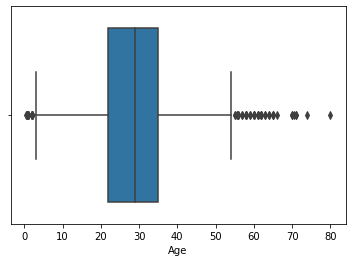

In [21]:
sns.boxplot(dataset['Age'])

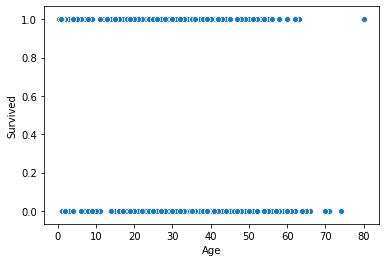

In [23]:
sns.scatterplot('Age','Survived',data=dataset)

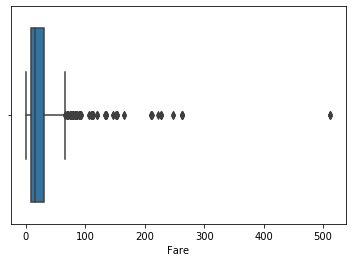

In [25]:
sns.boxplot('Fare',data=dataset)

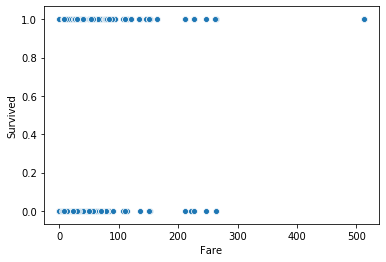

In [26]:
sns.scatterplot('Fare','Survived',data=dataset)

In [28]:
dataset.sort_values(by='Fare',ascending=False)[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [29]:
dataset.drop(dataset[dataset['Fare']>500].index, inplace=True)

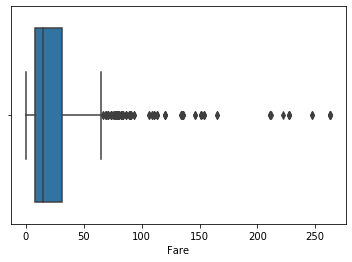

In [30]:
sns.boxplot(dataset['Fare'])

## logistic Regression model to predict chances of Survival

In [31]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
numerical_cols = dataset.select_dtypes(include=[np.number]).columns

In [34]:
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [35]:
titanic_number = dataset[numerical_cols]

In [36]:
titanic_number

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


### Create dummy variables for character data

In [37]:
character_cols =dataset.select_dtypes(include='object').columns

In [38]:
character_cols

Index(['Sex', 'Embarked'], dtype='object')

In [39]:
titanic_dummies = pd.get_dummies(dataset[character_cols])

In [40]:
titanic_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


### Combining numerical and dummy variables

In [41]:
titanic_combined = pd.concat([titanic_number,titanic_dummies],axis=1)

In [43]:
titanic_combined.drop(columns=['Sex_male','Embarked_C'],inplace=True)

In [44]:
titanic_combined.shape

(888, 9)

In [45]:
X = titanic_combined.drop(columns=['Survived'])
Y = titanic_combined['Survived']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [47]:
X_train.shape

(666, 8)

In [48]:
X_test.shape

(222, 8)

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
Y_pred = classifier.predict(X_test)

In [51]:
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

### Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[110  21]
 [ 32  59]]


In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7612612612612613


### Area under ROC curve

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
area_under_roc = roc_auc_score(Y_test, Y_pred)
print(area_under_roc)

0.744023152420099


### Plotting the ROC curve

In [57]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,classifier.predict_proba(X_test)[:,1])

In [67]:
type(pd.Series(thresholds))

fpr_series = pd.Series(fpr)
tpr_series = pd.Series(tpr)
thresholds_series = pd.Series(thresholds)

df = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLDS'])
df.sort_values(by='TPR',ascending=False)

,FPR,TPR,THRESHOLDS
77,1.000000,1.000000,0.049271
76,0.954198,1.000000,0.059344
75,0.954198,0.989011,0.059695
74,0.946565,0.989011,0.061154
73,0.946565,0.978022,0.064907
...,...,...,...
5,0.022901,0.340659,0.775150
2,0.000000,0.131868,0.924626
3,0.007634,0.131868,0.914222
1,0.000000,0.010989,0.963253


In [61]:
classifier.predict_proba(X_test)
## it shows the exact probability or chances of survival against non- survival
## here our base cut off is 0.5

array([[0.30319884, 0.69680116],
       [0.90417491, 0.09582509],
       [0.18590066, 0.81409934],
       [0.91451586, 0.08548414],
       [0.67838818, 0.32161182],
       [0.77263931, 0.22736069],
       [0.76249756, 0.23750244],
       [0.05078716, 0.94921284],
       [0.42131781, 0.57868219],
       [0.7104617 , 0.2895383 ],
       [0.9285046 , 0.0714954 ],
       [0.06588612, 0.93411388],
       [0.28861636, 0.71138364],
       [0.71199985, 0.28800015],
       [0.27306634, 0.72693366],
       [0.91664536, 0.08335464],
       [0.43036368, 0.56963632],
       [0.48228938, 0.51771062],
       [0.85997038, 0.14002962],
       [0.06302569, 0.93697431],
       [0.68994999, 0.31005001],
       [0.05984876, 0.94015124],
       [0.61516345, 0.38483655],
       [0.74316446, 0.25683554],
       [0.03674673, 0.96325327],
       [0.84788305, 0.15211695],
       [0.35583967, 0.64416033],
       [0.55412701, 0.44587299],
       [0.61522975, 0.38477025],
       [0.74488223, 0.25511777],
       [0.

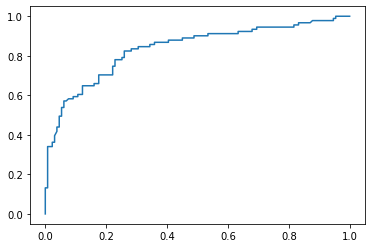

In [58]:
plt.plot(fpr,tpr)

In [62]:
thresholds

array([1.96325327, 0.96325327, 0.92462585, 0.91422182, 0.79360602,
       0.77515031, 0.75068403, 0.74740337, 0.72697768, 0.72693366,
       0.72692437, 0.71720731, 0.69801568, 0.69680116, 0.64959433,
       0.64416033, 0.63075951, 0.62657093, 0.62610873, 0.58612372,
       0.5857904 , 0.5817238 , 0.58128296, 0.57022995, 0.55562214,
       0.50081066, 0.49398201, 0.48548329, 0.43968935, 0.41634192,
       0.33812451, 0.33800087, 0.32748492, 0.32410224, 0.32161182,
       0.31876966, 0.31292745, 0.30084213, 0.2895383 , 0.27961112,
       0.27894177, 0.25683554, 0.25338444, 0.25057207, 0.23750244,
       0.23526594, 0.21269549, 0.21065433, 0.17634777, 0.17235709,
       0.16587803, 0.16453669, 0.1325898 , 0.13115671, 0.12620549,
       0.12517792, 0.12061324, 0.12049944, 0.12042402, 0.11055544,
       0.1080758 , 0.10724449, 0.10531611, 0.09887033, 0.09847081,
       0.09582509, 0.09567658, 0.09272842, 0.08869362, 0.08768156,
       0.08761158, 0.08225231, 0.08123457, 0.06490744, 0.06115